In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt

In [41]:
h_pars = camb.set_params(H0 = 50, ombh2 = 0.015, omch2 = 0.03, lmax=10000)
h_pars.set_accuracy(AccuracyBoost=3.0)
h_results = camb.get_results(h_pars)
h_powers =h_results.get_cmb_power_spectra(h_pars, CMB_unit='muK')

h_lensed = (h_powers['total'][2:5000, 0])
h_unlensed = (h_powers['unlensed_total'][2:5000, 0])
h_l = h_lensed/h_unlensed

l_pars = camb.set_params(H0 = 50, ombh2 = 0.015, omch2 = 0.03, lmax=10000)
l_pars.set_accuracy(AccuracyBoost=1.0)
l_results = camb.get_results(l_pars)
l_powers =l_results.get_cmb_power_spectra(l_pars, CMB_unit='muK')

l_lensed = (l_powers['total'][2:5000, 0])
l_unlensed = (l_powers['unlensed_total'][2:5000, 0])
l_l = h_lensed/l_unlensed

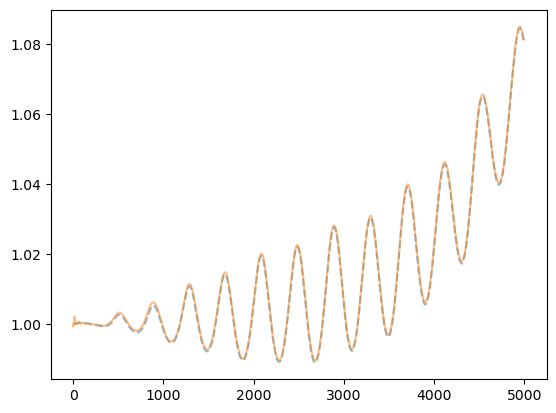

In [42]:
ells = np.array([l for l in range(2, 5000)])
plt.plot(ells, h_l, alpha = 0.5, linestyle = "dashed")
plt.plot(ells, l_l, alpha = 0.5)

In [2]:
l_bound = [50,1.7]  #H0, , As var,
u_bound = [80,3.3]

n = 600

cosmos = np.random.uniform(low=l_bound, high=u_bound, size=(n,len(l_bound)))

#pars = [camb.set_params(H0 = cosmos[i,0], ombh2=cosmos[i,1], omch2=cosmos[i,2], mnu=0.06, omk=0, tau=0.06,  
                           #As=np.exp(cosmos[i,3])/(1e10), ns=cosmos[i,4], halofit_version='mead', lmax=3000)for i in range(len(cosmos))]

pars = [camb.set_params(H0 = cosmos[i,0], As=np.exp(cosmos[i,1])/(1e10), lmax=5000)for i in range(len(cosmos))]

results = [camb.get_results(pars[i]) for i in range(len(cosmos))]
powers = [results[i].get_cmb_power_spectra(pars[i], CMB_unit = 'muK') for i in range(len(cosmos))]

totCL = [powers[i]["total"] for i in range(len(cosmos))]
unlensedCL = [powers[i]["unlensed_scalar"] for i in range(len(cosmos))]

totals = [totCL[i][2:5000,0] for i in range(len(cosmos))]
unlensed = [unlensedCL[i][2:5000,0] for i in range(len(cosmos))]
fractional = [1 - unlensedCL[i][2:,0]/totCL[i][2:,0] for i in range(len(cosmos))]

In [4]:
np.save('CL_data/parameter_as1.npy', cosmos)
np.save('CL_data/unlensed_as1.npy', unlensed)
np.save('CL_data/lensed_as1.npy', totals)